In [2]:
import json
import pandas as pd
import numpy as np
from pprint import pprint
import time

FILE_RAW = r"C:\Users\dtrizna\Code\ReverseShellModel\data\auditd_raw\1662470678.json"

# [:-1] since last element is some label
data = json.load(open(FILE_RAW, "r"))[:-1]
df = pd.json_normalize(data)

# Basic EDA

In [3]:
df.head()

,auditd.data.arch,Headers.VmId,Headers.SubscriptionId,Role,process.ppid,hostname,rule.sidid,Headers.Workload,TimeStamp,auditd.data.a1,...,kubernetes.labels.clustername,kubernetes.labels.adoreleasetimestamp,kubernetes.labels.namespacename,kubernetes.labels.partition,kubernetes.namespace_labels.cosmic_office_com/namespace-instance,kubernetes.labels.ns-instanceid,kubernetes.labels.release,kubernetes.labels.chart,kubernetes.labels.heritage,auditd.data.socket.saddr
0,x86_64,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,linux-container-workernode,9682,aks-lp010-34520168-vmss_3,execution,CosmicD2Linux,2022-09-06T12:17:54.3430000Z,5ab4df87dc40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,x86_64,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,linux-container-workernode,28664,aks-lp010-34520168-vmss_3,execution,CosmicD2Linux,2022-09-06T12:17:54.8990000Z,5cf63d7215c0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,x86_64,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,linux-container-workernode,9789,aks-lp010-34520168-vmss_3,execution,CosmicD2Linux,2022-09-06T12:17:54.9030000Z,7fff41917738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,x86_64,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,linux-container-workernode,28664,aks-lp010-34520168-vmss_3,execution,CosmicD2Linux,2022-09-06T12:17:54.9190000Z,5cf63d72c6e0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,x86_64,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,linux-container-workernode,890,aks-lp010-34520168-vmss_3,execution,CosmicD2Linux,2022-09-06T12:17:56.2870000Z,c0001aadd0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29545 entries, 0 to 29544
Columns: 153 entries, auditd.data.arch to auditd.data.socket.saddr
dtypes: object(153)
memory usage: 34.5+ MB


In [5]:
sample = df.iloc[0]
pprint(sample.index.to_list())

['auditd.data.arch',
 'Headers.VmId',
 'Headers.SubscriptionId',
 'Role',
 'process.ppid',
 'hostname',
 'rule.sidid',
 'Headers.Workload',
 'TimeStamp',
 'auditd.data.a1',
 'Headers.CustomerName',
 'auditd.data.a2',
 'full_log',
 'kubernetes.Info',
 'Headers.ResourceGroupName',
 'process.args',
 'Rule',
 'auditd.data.tty',
 'Headers.ClusterName',
 'Latency',
 'auditd.message_type',
 'auditd.data.a3',
 'Headers.Role',
 'auditd.data.exit',
 'id',
 'process.title',
 'auditd.data.syscall',
 'auditd.summary.object.primary',
 'process.name',
 'process.executable',
 'auditd.result',
 'auditd.summary.actor.secondary',
 'process.working_directory',
 'auditd.sequence',
 'auditd.summary.object.type',
 'program_name',
 'auditd.summary.actor.primary',
 'auditd.summary.how',
 'auditd.data.argc',
 'Headers.Environment',
 'auditd.data.a0',
 'sidid',
 'process.pid',
 'auditd.data.socket.family',
 'auditd.data.socket.port',
 'auditd.data.socket.addr',
 'auditd.summary.object.secondary',
 'kubernetes.da

In [6]:
data[0].keys()

dict_keys(['auditd.data.arch', 'Headers.VmId', 'Headers.SubscriptionId', 'Role', 'process.ppid', 'hostname', 'rule.sidid', 'Headers.Workload', 'TimeStamp', 'auditd.data.a1', 'Headers.CustomerName', 'auditd.data.a2', 'full_log', 'kubernetes.Info', 'Headers.ResourceGroupName', 'process.args', 'Rule', 'auditd.data.tty', 'Headers.ClusterName', 'Latency', 'auditd.message_type', 'auditd.data.a3', 'Headers.Role', 'auditd.data.exit', 'id', 'process.title', 'auditd.data.syscall', 'auditd.summary.object.primary', 'process.name', 'process.executable', 'auditd.result', 'auditd.summary.actor.secondary', 'process.working_directory', 'auditd.sequence', 'auditd.summary.object.type', 'program_name', 'auditd.summary.actor.primary', 'auditd.summary.how', 'auditd.data.argc', 'Headers.Environment', 'auditd.data.a0', 'sidid', 'process.pid'])

In [7]:
df["rule.sidid"].value_counts()

execution                 25291
mount                      1489
external-access            1263
log-modification            554
user_start                  294
user_end                    282
bind-access                 204
time-change                  44
perm_modification            39
inbound-access               30
unsucces_file_access         17
systemd-modification         14
auditbeat-hb                  8
cron_jobs                     6
kernel_module                 5
kernel_sysctl                 4
unsucces_file_creation        1
Name: rule.sidid, dtype: int64

# NaN values & Feature Selection

<AxesSubplot:>

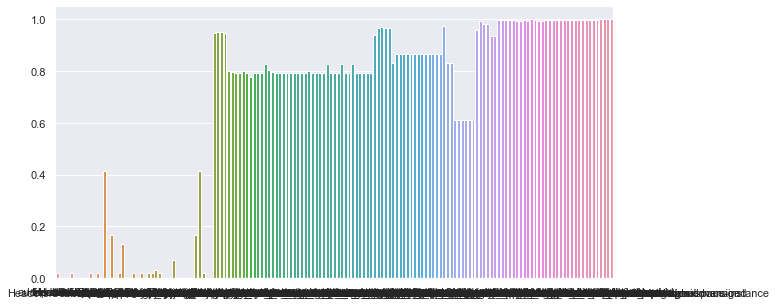

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

isna = df.isna().sum()/df.shape[0]

# plot ratio of missing values as barplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=isna.index, y=isna.values, ax=ax)

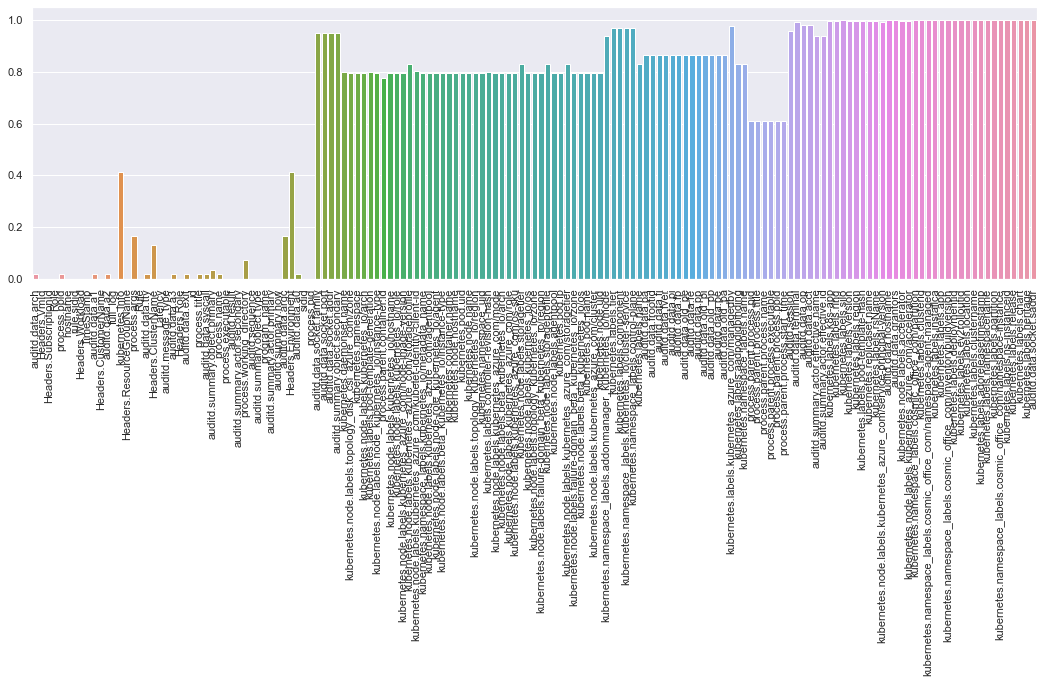

In [9]:
fig, ax = plt.subplots(1,1, figsize=(18,5))
isnaplot = sns.barplot(x=isna.index, y=isna.values, ax=ax)

# rotate xticks
for item in isnaplot.get_xticklabels():
    item.set_rotation(90)

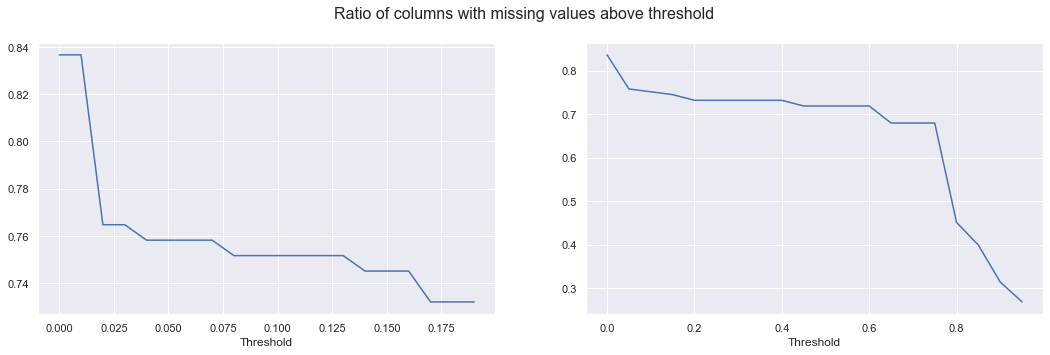

In [10]:
def plot_ratio(ax, RANGE):
    ratios = []
    m = {}
    for threshold in RANGE:
        ratio = sum(isna > threshold/100)/isna.shape[0]
        ratios.append(ratio)
        m[str(threshold/100)] = set(isna[isna > threshold/100].index)

    sns.lineplot(x=[x/100 for x in RANGE], y=ratios, ax=ax)
    ax.set_xlabel("Threshold")
    return m

fig, ax = plt.subplots(1,2, figsize=(18,5))
small = plot_ratio(ax[0], range(0,20,1))
full = plot_ratio(ax[1], range(0,100,5))
_ = fig.suptitle("Ratio of columns with missing values above threshold", fontsize=16)

In [11]:
temp = df.isna().sum(axis=0)
temp[temp == 0].index.to_list()

['Headers.VmId',
 'Headers.SubscriptionId',
 'Role',
 'hostname',
 'rule.sidid',
 'Headers.Workload',
 'TimeStamp',
 'Headers.CustomerName',
 'full_log',
 'Headers.ResourceGroupName',
 'Rule',
 'Latency',
 'auditd.message_type',
 'Headers.Role',
 'id',
 'process.executable',
 'auditd.result',
 'auditd.summary.actor.secondary',
 'auditd.sequence',
 'auditd.summary.object.type',
 'program_name',
 'auditd.summary.actor.primary',
 'auditd.summary.how',
 'sidid',
 'process.pid']

In [12]:
keys = list(full.keys())
for i, key in enumerate(keys):
    if i == 0:
        print(f"Present in all events:\n")
        temp = df.isna().sum(axis=0)
        all_event_cols = temp[temp == 0].index.to_list()
        pprint(all_event_cols)
    print(f"\nColumns with missing values above {key} that are not in {keys[i-1]}")
    pprint(full[keys[i-1]] - full[key])

Present in all events:

['Headers.VmId',
 'Headers.SubscriptionId',
 'Role',
 'hostname',
 'rule.sidid',
 'Headers.Workload',
 'TimeStamp',
 'Headers.CustomerName',
 'full_log',
 'Headers.ResourceGroupName',
 'Rule',
 'Latency',
 'auditd.message_type',
 'Headers.Role',
 'id',
 'process.executable',
 'auditd.result',
 'auditd.summary.actor.secondary',
 'auditd.sequence',
 'auditd.summary.object.type',
 'program_name',
 'auditd.summary.actor.primary',
 'auditd.summary.how',
 'sidid',
 'process.pid']

Columns with missing values above 0.0 that are not in 0.95
set()

Columns with missing values above 0.05 that are not in 0.0
{'auditd.data.a0',
 'auditd.data.a1',
 'auditd.data.a2',
 'auditd.data.a3',
 'auditd.data.arch',
 'auditd.data.exit',
 'auditd.data.syscall',
 'auditd.data.tty',
 'auditd.summary.object.primary',
 'process.name',
 'process.ppid',
 'process.title'}

Columns with missing values above 0.1 that are not in 0.05
{'process.working_directory'}

Columns with missing values abov

In [13]:
llist = list({'auditd.data.a0',
 'auditd.data.a1',
 'auditd.data.a2',
 'auditd.data.a3',
 'auditd.data.arch',
 'auditd.data.exit',
 'auditd.data.syscall',
 'auditd.data.tty',
 'auditd.summary.object.primary',
 'process.name',
 'process.ppid',
 'process.title',
 'process.args'})

df[llist]

,process.name,auditd.data.arch,auditd.data.a3,auditd.data.a2,auditd.summary.object.primary,process.title,auditd.data.exit,auditd.data.a0,process.args,auditd.data.syscall,auditd.data.tty,process.ppid,auditd.data.a1
0,grep,x86_64,8,5ab4df87f230,/usr/bin/grep,grep -qi ImageStatus failed,0,5ab4df87d9b0,grep -qi ImageStatus failed,execve,(none),9682,5ab4df87dc40
1,timeout,x86_64,1b6,5cf63d71f030,/usr/bin/timeout,timeout 60 ctr --namespace k8s.io container list,0,5cf63d72db70,timeout 60 ctr --namespace k8s.io container list,execve,(none),28664,5cf63d7215c0
2,ctr,x86_64,8,7fff41917768,/usr/bin/ctr,timeout 60 ctr --namespace k8s.io container list,0,7fff41917400,ctr --namespace k8s.io container list,execve,(none),9789,7fff41917738
3,sleep,x86_64,8,5cf63d71f030,/usr/bin/sleep,sleep 10,0,5cf63d72cb70,sleep 10,execve,(none),28664,5cf63d72c6e0
4,check_preempt.s,x86_64,8,c000a30780,/etc/node-problem-detector.d/plugin/check_pree...,/bin/bash /etc/node-problem-detector.d/plugin/...,0,c0001e01c0,/bin/bash /etc/node-problem-detector.d/plugin/...,execve,(none),890,c0001aadd0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29540,basename,x86_64,8,55d4d6b78260,/usr/bin/basename,basename /usr/sbin/service,0,55d4d6b7cdc0,basename /usr/sbin/service,execve,(none),7107,55d4d6b7cb40
29541,basename,x86_64,55d4d6b6c010,55d4d6b78260,/usr/bin/basename,basename /usr/sbin/service,0,55d4d6b7cc60,basename /usr/sbin/service,execve,(none),7107,55d4d6b7a010
29542,systemctl,x86_64,8,55d4d6b78260,/bin/systemctl,systemctl --quiet is-active multi-user.target,0,55d4d6b84590,systemctl --quiet is-active multi-user.target,execve,(none),7107,55d4d6b7ce70
29543,systemctl,x86_64,0,55d4d6b865f0,/bin/systemctl,/bin/sh /usr/sbin/service slave-ha-service status,0,55d4d6b86260,systemctl status slave-ha-service.service,execve,(none),7105,55d4d6b86100


# Field analysis

`process.title` is present in network events, whereas `process.args` not...

In [14]:
networkdf = df[df["rule.sidid"] == 'external-access']
networkdf[['process.title', 'process.args']]

,process.title,process.args
6,curl -H Metadata:true --noproxy * http://169.2...,NaN
12,curl -H Metadata:true --noproxy * http://169.2...,NaN
18,curl -H Metadata:true --noproxy * http://169.2...,NaN
21,/usr/bin/python3 -u bin/WALinuxAgent-2.7.3.0-p...,NaN
32,curl -H Metadata:true --noproxy * http://169.2...,NaN
...,...,...
29060,node --max-old-space-size=8192 /srv/mover/back...,NaN
29091,node --max-old-space-size=8192 /srv/mover/back...,NaN
29133,node --max-old-space-size=8192 /srv/mover/back...,NaN
29216,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dpro...,NaN


`'auditd.summary.object.secondary'` is port, and can be preserved with `'auditd.data.socket.port'` more meaningfully

In [15]:
col = 'auditd.summary.object.secondary'
df[df[col].notna()][col]

6          80
12         80
18         80
21        443
32         80
         ... 
29139       0
29143       0
29216     443
29284    1087
29285     443
Name: auditd.summary.object.secondary, Length: 1497, dtype: object

### `auditd.data.`

Not sure if preserving 
```
'auditd.data.a0',
 'auditd.data.a1',
 'auditd.data.a2',
 'auditd.data.a3',
```
... is worth it...

Taking a look on how many different values are there:

In [16]:
df['auditd.data.argc'].value_counts()[0:5]

3    8748
2    8395
4    2104
5    1837
8     910
Name: auditd.data.argc, dtype: int64

In [17]:
args = ['auditd.data.a0',
 'auditd.data.a1',
 'auditd.data.a2',
 'auditd.data.a3']
df[args]

def count_unique_elements_in_array(arr):
    return len(set(arr))
count_unique_elements_in_array(df[args].values.flatten())

55875

In [18]:
df[args].apply(pd.Series.nunique).sum()

57190

Almost no overlap, but it is. This means some values in `.a1` can be seen in `.a2` for example.
This means this values represent some meaning.

In [19]:
def get_values(fieldA, fieldB):
    values = df[fieldA].values
    mask = df[fieldB].apply(lambda x: x in values)
    return df[mask]
fieldA = 'auditd.data.a0'
fieldB = 'auditd.data.a1'
valueCheck = get_values(fieldA, fieldB)

In [20]:
valueCheck[fieldB].iloc[0:3]

24    7fff9896ad80
26    7fff9896ad80
29               0
Name: auditd.data.a1, dtype: object

In [21]:
df[df[fieldA] == '7fff9896ad80'][['process.title', fieldA, fieldB]]

,process.title,auditd.data.a0,auditd.data.a1
25,/usr/bin/runc init,7fff9896ad80,2


In [22]:
df[df[fieldB] == '7fff9896ad80'][['process.title', fieldA, fieldB]]

,process.title,auditd.data.a0,auditd.data.a1
24,/usr/bin/runc init,5c97b0de1bca,7fff9896ad80
26,/usr/bin/runc init,5c97b0de210d,7fff9896ad80


But here again -- `a0` differs in both events.. Really don't get what it means...

#### `process.pid` & `process.ppid` ?

In [23]:
df['process.pid'].value_counts()[0:20]

26867    167
15021     86
1024      36
345       33
26197     22
11534     16
4938      15
22757     14
3933      13
5034      13
4083      13
13570     12
1048      12
1061      12
13943     12
20843     12
12646     12
7224      11
18355     11
25564     11
Name: process.pid, dtype: int64

In [24]:
df['process.ppid'].value_counts()[0:20]

1        736
21513    307
18575    173
26030    170
1054     167
16055    120
2214     112
24561    104
9280     101
27717     85
27097     71
26640     67
14850     65
2406      64
9260      64
21736     63
4125      63
17216     62
23997     62
11534     62
Name: process.ppid, dtype: int64

Might get valuable to preserve `ppid` and preserve `1`, with substitute of all other to specific label?

### Working directory -- valuable:

In [25]:
df['process.working_directory'].value_counts()[0:20]

/                                                                                                                                      20637
/pushgateway                                                                                                                             883
/root                                                                                                                                    854
/opt                                                                                                                                     550
/home/yarn                                                                                                                               493
/SetupAzSecPack                                                                                                                          332
/srv/mover/backend                                                                                                                       299
/run/containe

#### `full_log` almost always same as executable

In [26]:
print(df.shape[0])
(df['full_log'] == df['process.executable']).sum()

29545


28099

#### `Headers.` have value for environmental stuff, like train/test split, but not for model

In [27]:
cc = [x for x in df.columns if "Headers" in x]
df[cc]

,Headers.VmId,Headers.SubscriptionId,Headers.Workload,Headers.CustomerName,Headers.ResourceGroupName,Headers.ClusterName,Headers.Role,Headers.Environment
0,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,CosmicD2Linux,Cosmic-D2-Kevlar-Linux,cosmic-msit-sc01-000-apac-japanwest-nodes,cosmic-msit-sc01-000-apac-japanwest-aks,linux-container-workernode,production
1,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,CosmicD2Linux,Cosmic-D2-Kevlar-Linux,cosmic-msit-sc01-000-apac-japanwest-nodes,cosmic-msit-sc01-000-apac-japanwest-aks,linux-container-workernode,production
2,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,CosmicD2Linux,Cosmic-D2-Kevlar-Linux,cosmic-msit-sc01-000-apac-japanwest-nodes,cosmic-msit-sc01-000-apac-japanwest-aks,linux-container-workernode,production
3,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,CosmicD2Linux,Cosmic-D2-Kevlar-Linux,cosmic-msit-sc01-000-apac-japanwest-nodes,cosmic-msit-sc01-000-apac-japanwest-aks,linux-container-workernode,production
4,5b404f7d-a9d1-4185-8a3e-54cd31bb10d9,5654d4bb-0610-4887-ae1d-ce38842a1bdb,CosmicD2Linux,Cosmic-D2-Kevlar-Linux,cosmic-msit-sc01-000-apac-japanwest-nodes,cosmic-msit-sc01-000-apac-japanwest-aks,linux-container-workernode,production
...,...,...,...,...,...,...,...,...
29540,13bc15a4-c1cc-4d8e-88a3-6ee1f70eb1f2,8261a4f3-ae09-4d5a-b324-3de7569b6cdd,TenantKnowledgePlatformLinuxGCP,HERONhdi9d47b81fapac,rg0-8c214c16020a4d0b82cb4056aa38ed88resourcegroup,hdi9d47b81fapac,WorkerNode,NaN
29541,13bc15a4-c1cc-4d8e-88a3-6ee1f70eb1f2,8261a4f3-ae09-4d5a-b324-3de7569b6cdd,TenantKnowledgePlatformLinuxGCP,HERONhdi9d47b81fapac,rg0-8c214c16020a4d0b82cb4056aa38ed88resourcegroup,hdi9d47b81fapac,WorkerNode,NaN
29542,13bc15a4-c1cc-4d8e-88a3-6ee1f70eb1f2,8261a4f3-ae09-4d5a-b324-3de7569b6cdd,TenantKnowledgePlatformLinuxGCP,HERONhdi9d47b81fapac,rg0-8c214c16020a4d0b82cb4056aa38ed88resourcegroup,hdi9d47b81fapac,WorkerNode,NaN
29543,13bc15a4-c1cc-4d8e-88a3-6ee1f70eb1f2,8261a4f3-ae09-4d5a-b324-3de7569b6cdd,TenantKnowledgePlatformLinuxGCP,HERONhdi9d47b81fapac,rg0-8c214c16020a4d0b82cb4056aa38ed88resourcegroup,hdi9d47b81fapac,WorkerNode,NaN


#### `auditd.summary.*` fields are valuable

In [28]:
cc = [x for x in df.columns if "auditd.summary" in x]
df[cc]

,auditd.summary.object.primary,auditd.summary.actor.secondary,auditd.summary.object.type,auditd.summary.actor.primary,auditd.summary.how,auditd.summary.object.secondary,auditd.summary.actor.effective.name,auditd.summary.actor.effective.id
0,/usr/bin/grep,root,file,unset,/usr/bin/grep,NaN,NaN,NaN
1,/usr/bin/timeout,root,file,unset,/usr/bin/timeout,NaN,NaN,NaN
2,/usr/bin/ctr,root,file,unset,/usr/bin/ctr,NaN,NaN,NaN
3,/usr/bin/sleep,root,file,unset,/usr/bin/sleep,NaN,NaN,NaN
4,/etc/node-problem-detector.d/plugin/check_pree...,root,file,unset,check_preempt.s,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
29540,/usr/bin/basename,root,file,unset,/usr/bin/basename,NaN,NaN,NaN
29541,/usr/bin/basename,root,file,unset,/usr/bin/basename,NaN,NaN,NaN
29542,/bin/systemctl,root,file,unset,/bin/systemctl,NaN,NaN,NaN
29543,/bin/systemctl,root,file,unset,/bin/systemctl,NaN,NaN,NaN


In [29]:
df['auditd.summary.how'] == df['process.executable']

0         True
1         True
2         True
3         True
4        False
         ...  
29540     True
29541     True
29542     True
29543     True
29544     True
Length: 29545, dtype: bool

In [30]:
df['auditd.summary.object.type'].value_counts()

file            27424
socket           1497
user-session      576
system             44
filesystem          4
Name: auditd.summary.object.type, dtype: int64

In [31]:
df['auditd.summary.object.secondary'].value_counts()[0:5] # sockets

80      586
443     582
0       235
6380     14
5671     11
Name: auditd.summary.object.secondary, dtype: int64

#### `sidid` just duplicate field

In [32]:
df['sidid'] == df['rule.sidid']

0        True
1        True
2        True
3        True
4        True
         ... 
29540    True
29541    True
29542    True
29543    True
29544    True
Length: 29545, dtype: bool

#### For network events `auditd.data.socket` are just parsed fields of `auditd.summary.object`

In [33]:
cc = [x for x in df.columns if "auditd.data" in x]
temp = networkdf[cc].isna().sum()
cc_valid = set(cc) - set(temp[temp == networkdf.shape[0]].index.to_list())
networkdf[cc_valid]

<ipython-input-33-f98db6ac5820>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  networkdf[cc_valid]


,auditd.data.arch,auditd.data.a2,auditd.data.socket.addr,auditd.data.socket.port,auditd.data.exit,auditd.data.a0,auditd.data.syscall,auditd.data.socket.family,auditd.data.tty,auditd.data.a3,auditd.data.a1
6,x86_64,10,169.254.169.254,80,EINPROGRESS,5,connect,ipv4,(none),7ffe51fea000,7ffe51f5c2f0
12,x86_64,10,169.254.169.254,80,EINPROGRESS,5,connect,ipv4,(none),7ffc13f40000,7ffc13efbc00
18,x86_64,10,169.254.169.254,80,EINPROGRESS,5,connect,ipv4,(none),7ffd38aee000,7ffd38a6d800
21,x86_64,10,104.215.35.62,443,EINPROGRESS,3,connect,ipv4,(none),0,7ffd2d1b1140
32,x86_64,10,169.254.169.254,80,EINPROGRESS,5,connect,ipv4,(none),7ffd5bbdf000,7ffd5ba21a50
...,...,...,...,...,...,...,...,...,...,...,...
29060,x86_64,10,191.235.250.36,443,EINPROGRESS,3f,connect,ipv4,(none),7ffd075b2cc0,7ffd075b2ec0
29091,x86_64,10,191.235.250.36,443,EINPROGRESS,8c,connect,ipv4,(none),7ffdddadc6d0,7ffdddadc8d0
29133,x86_64,10,52.239.233.68,443,EINPROGRESS,79,connect,ipv4,(none),7ffc59110af0,7ffc59110cf0
29216,x86_64,10,20.60.223.98,443,EINPROGRESS,1ba,connect,ipv4,(none),7cc6,7ff7bb683980


In [34]:
networkdf['auditd.summary.object.primary'] == networkdf['auditd.data.socket.addr']

6        True
12       True
18       True
21       True
32       True
         ... 
29060    True
29091    True
29133    True
29216    True
29285    True
Length: 1263, dtype: bool

In [35]:
networkdf['auditd.summary.object.secondary'] == networkdf['auditd.data.socket.port']

6        True
12       True
18       True
21       True
32       True
         ... 
29060    True
29091    True
29133    True
29216    True
29285    True
Length: 1263, dtype: bool

#### `process.parent.*`

In [36]:
cc = [x for x in df.columns if "process.parent" in x]
df[cc]

,process.parent.container.id,process.parent.process.pid,process.parent.process.title,process.parent.process.name,process.parent.process.executable,process.parent.process.ppid,process.parent.process.start_time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
29540,NaN,7107,/bin/sh /usr/sbin/service slave-ha-service status,service,/bin/bash,7105,2022-09-06T12:17:35.8900000Z
29541,NaN,7107,/bin/sh /usr/sbin/service slave-ha-service status,service,/bin/bash,7105,2022-09-06T12:17:35.8900000Z
29542,NaN,7107,/bin/sh /usr/sbin/service slave-ha-service status,service,/bin/bash,7105,2022-09-06T12:17:35.8900000Z
29543,NaN,7105,sudo service slave-ha-service status,sudo,/usr/bin/sudo,6042,2022-09-06T12:17:35.8800000Z


In [37]:
idxs = df[cc].isna().sum(axis=1)
print(f"{(idxs == 7).sum()*100/idxs.shape[0]:.2f}% miss process.parent.* information")

40.87% miss process.parent.* information


In [38]:
print(f"{df['process.parent.process.title'].isna().sum()*100/df.shape[0]:.2f}% miss process.parent.process.title")

61.18% miss process.parent.process.title


so for ~40% of events this info will be valuable

In [39]:
df[df['process.parent.process.title'].notna()][cc]

,process.parent.container.id,process.parent.process.pid,process.parent.process.title,process.parent.process.name,process.parent.process.executable,process.parent.process.ppid,process.parent.process.start_time
141,ef8cca1834ea8546489b6d6f4693680b5be18abd0cfed8...,9280,php /srv/mover/backend/queue_worker.php,php,/usr/local/bin/php,9263,2022-08-30T21:04:34.1800000Z
142,NaN,32007,,sh,,9280,2022-09-06T12:19:07.4800000Z
143,NaN,32007,,sh,,9280,2022-09-06T12:19:07.4800000Z
144,bb9f84d92e7c385dd6a69a432e2b17fe334234654deb35...,26030,/bin/sh /opt/rabbitmq/sbin/rabbitmq-server,rabbitmq-server,/bin/dash,26013,2022-07-13T21:00:52.6400000Z
145,ef8cca1834ea8546489b6d6f4693680b5be18abd0cfed8...,9280,php /srv/mover/backend/queue_worker.php,php,/usr/local/bin/php,9263,2022-08-30T21:04:34.1800000Z
...,...,...,...,...,...,...,...
29539,NaN,7105,sudo service slave-ha-service status,sudo,/usr/bin/sudo,6042,2022-09-06T12:17:35.8800000Z
29540,NaN,7107,/bin/sh /usr/sbin/service slave-ha-service status,service,/bin/bash,7105,2022-09-06T12:17:35.8900000Z
29541,NaN,7107,/bin/sh /usr/sbin/service slave-ha-service status,service,/bin/bash,7105,2022-09-06T12:17:35.8900000Z
29542,NaN,7107,/bin/sh /usr/sbin/service slave-ha-service status,service,/bin/bash,7105,2022-09-06T12:17:35.8900000Z


In [40]:
print("process.parent.ppid appears", df['process.parent.process.ppid'].isna().sum())
print("process.parent.ppid equals to process.ppid", (df['process.parent.process.pid'] == df['process.ppid']).sum())
(df['process.parent.process.ppid'] == df['process.ppid']).sum()

process.parent.ppid appears 18076
process.parent.ppid equals to process.ppid 11469


0

#### syscall -- worth preserving? or is reflected in `sidid`?

In [50]:
df[df['rule.sidid'] == 'execution']['auditd.data.syscall'].value_counts()

execve      24784
execveat      507
Name: auditd.data.syscall, dtype: int64

In [51]:
df[df['rule.sidid'] != 'execution']['auditd.data.syscall'].value_counts()

connect     1263
mount        999
umount2      490
openat       335
open         242
bind         204
adjtimex      44
accept4       30
chown         21
mkdir         17
fchmod        16
unlink        10
execve         5
chmod          2
Name: auditd.data.syscall, dtype: int64

#### `auditd.summary.object.type` 
-- relfects `sidid` - not worth preserving.

In [61]:
df['auditd.summary.object.type'].value_counts()

file            27424
socket           1497
user-session      576
system             44
filesystem          4
Name: auditd.summary.object.type, dtype: int64

In [62]:
df['rule.sidid'].value_counts()

execution                 25291
mount                      1489
external-access            1263
log-modification            554
user_start                  294
user_end                    282
bind-access                 204
time-change                  44
perm_modification            39
inbound-access               30
unsucces_file_access         17
systemd-modification         14
auditbeat-hb                  8
cron_jobs                     6
kernel_module                 5
kernel_sysctl                 4
unsucces_file_creation        1
Name: rule.sidid, dtype: int64

In [73]:
fileaccessdf = df[df['rule.sidid'] == 'unsucces_file_access'].dropna(axis=1)
cols = [x for x in fileaccessdf.columns if 'auditd.' in x]
df[df['rule.sidid'] == 'unsucces_file_access'][cols]


,auditd.data.arch,auditd.data.a1,auditd.data.a2,auditd.data.tty,auditd.message_type,auditd.data.a3,auditd.data.exit,auditd.data.syscall,auditd.summary.object.primary,auditd.result,auditd.summary.actor.secondary,auditd.sequence,auditd.summary.object.type,auditd.summary.actor.primary,auditd.summary.how,auditd.data.a0,auditd.session
1235,x86_64,31d56a8,80042,(none),syscall,180,EACCES,openat,/var/run/mdsd/default.lock,fail,hdinsight-zookeeper,448684875,file,root,/usr/sbin/mdsd,ffffff9c,680207
1283,x86_64,7fff6827a560,80000,(none),syscall,0,EACCES,openat,/proc/1/environ,fail,ambari-qa,448684971,file,ambari-qa,/lib/systemd/systemd,ffffff9c,680210
1284,x86_64,55fbbda29120,80101,(none),syscall,0,EACCES,openat,/sys/fs/cgroup/memory/memory.use_hierarchy,fail,ambari-qa,448684972,file,ambari-qa,/lib/systemd/systemd,ffffff9c,680210
1287,x86_64,7ffe72b62d70,80000,(none),syscall,0,EACCES,openat,/proc/1/environ,fail,ambari-qa,448684975,file,ambari-qa,/usr/lib/systemd/user-environment-generators/3...,ffffff9c,680210
1297,x86_64,7fff6827ad00,80000,(none),syscall,0,EACCES,openat,/sys/module/configfs/uevent,fail,ambari-qa,448684989,file,ambari-qa,/lib/systemd/systemd,ffffff9c,680210
1298,x86_64,7fff6827ad00,80000,(none),syscall,0,EACCES,openat,/sys/module/fuse/uevent,fail,ambari-qa,448684990,file,ambari-qa,/lib/systemd/systemd,ffffff9c,680210
1324,x86_64,55fbbda32610,80101,(none),syscall,0,EACCES,openat,/sys/fs/cgroup/pids/user.slice/user-2003.slice...,fail,ambari-qa,448685047,file,ambari-qa,/lib/systemd/systemd,ffffff9c,680210
1326,x86_64,55fbbda66000,80101,(none),syscall,0,EACCES,openat,/sys/fs/cgroup/cpu/user.slice/cgroup.procs,fail,ambari-qa,448685051,file,ambari-qa,/lib/systemd/systemd,ffffff9c,680210
1327,x86_64,55fbbda29490,80101,(none),syscall,0,EACCES,openat,/sys/fs/cgroup/cpu/cgroup.procs,fail,ambari-qa,448685052,file,ambari-qa,/lib/systemd/systemd,ffffff9c,680210
4818,x86_64,47d56a8,80042,(none),syscall,180,EACCES,openat,/var/run/mdsd/default.lock,fail,hdinsight-zookeeper,228841359,file,root,/usr/sbin/mdsd,ffffff9c,201038


#### `auditd.summary.how`:
.. either the same as `auditd.summary.object.primary` or with `process.executable` -- can be ignored.

In [52]:
(df['auditd.summary.how'] == df['auditd.summary.object.primary']).sum()/df.shape[0]

0.5160264004061601

In [57]:
temp = df[(df['auditd.summary.how'] != df['auditd.summary.object.primary'])]
temp[['auditd.summary.how', 'auditd.summary.object.primary']]

,auditd.summary.how,auditd.summary.object.primary
4,check_preempt.s,/etc/node-problem-detector.d/plugin/check_pree...
5,check_scheduled,/etc/node-problem-detector.d/plugin/check_sche...
6,/usr/bin/curl,169.254.169.254
8,/usr/sbin/xtables-legacy-multi,/usr/sbin/iptables
9,/usr/sbin/xtables-legacy-multi,/usr/sbin/ip6tables
...,...,...
29530,/bin/bash,/usr/sbin/service
29536,/usr/bin/sudo,NaN
29538,/usr/bin/sudo,NaN
29539,/bin/bash,/usr/sbin/service


In [59]:
(temp['auditd.summary.how'] == temp['process.executable']).sum()/temp.shape[0]

0.8224351353241486

#### Preserve rule types that appear reasonably often

In [74]:
temp = df[(df['auditd.summary.how'] != df['auditd.summary.object.primary'])]['rule.sidid'].value_counts()
temp[temp > 10].index.to_list()

['execution',
 'mount',
 'external-access',
 'log-modification',
 'user_start',
 'user_end',
 'bind-access',
 'time-change',
 'perm_modification',
 'inbound-access',
 'unsucces_file_access',
 'systemd-modification']

# Summarizing pre-processing

Want to preserve the following columns:

```
'TimeStamp',
'rule.sidid',
'hostname',
'auditd.data.syscall',
'auditd.summary.actor.primary',
'auditd.summary.actor.secondary',
'auditd.summary.object.primary',
'auditd.summary.object.secondary',
'process.title',
'process.working_directory',
'process.ppid',
'process.parent.process.executable',
'process.parent.process.title'
```

Field analysis above, but summary:

- `process.ppid` -- PARENT PID, preserve if value `==1`, and replace all other PIDs with dedicated label
- `process.parent.*` -- present in ~40% out of my sample, but consider valuable enough to preserve `executable` and `title` fields
- `process.title` -- even though limited to 128 chars, it has presence in network events (whereas `process.args` only in `execution` events)


Thrown away (to potentially generalize later with Windows telemetry), but might consider:
```
'auditd.data.syscall',
'auditd.data.arch'
'auditd.data.exit',
'auditd.data.tty',
'auditd.data.argc',
```
As well as -- `auditd.data.aX` -- weird semantics, will discard for now, but might want to include in future A/B tests

Preserving only the following `rule.sidid`:

```
[
 'execution',
 'mount',
 'external-access',
 'log-modification',
 'user_start',
 'user_end',
 'bind-access',
 'time-change',
 'perm_modification',
 'inbound-access',
 'unsucces_file_access',
 'systemd-modification'
 ]
```

Preserving saves 99.8% of data:

In [80]:
sids = [
 'execution',
 'mount',
 'external-access',
 'log-modification',
 'user_start',
 'user_end',
 'bind-access',
 'time-change',
 'perm_modification',
 'inbound-access',
 'unsucces_file_access'
]
df['rule.sidid'].isin(sids).sum()/df.shape[0]

0.9987138263665595

In [82]:
df[df['rule.sidid'].isin(sids)]

0        True
1        True
2        True
3        True
4        True
         ... 
29540    True
29541    True
29542    True
29543    True
29544    True
Name: rule.sidid, Length: 29545, dtype: bool

In [93]:
cols = [
    'TimeStamp',
    'rule.sidid',
    'hostname',
    'auditd.data.syscall',
    'auditd.summary.actor.primary',
    'auditd.summary.actor.secondary',
    'auditd.summary.object.primary',
    'auditd.summary.object.secondary',
    'process.title',
    'process.working_directory',
    'process.ppid',
    'process.parent.process.executable',
    'process.parent.process.title'
]

sids = [
 'execution',
 'mount',
 'external-access',
 'log-modification',
 'user_start',
 'user_end',
 'bind-access',
 'time-change',
 'perm_modification',
 'inbound-access',
 'unsucces_file_access'
]

newdf = df[df['rule.sidid'].isin(sids)][cols].copy()

# dealing with NaN to avoid errors
newdf.fillna("(none)", inplace=True)

## ppid preprocessing
newdf['process.ppid'] = newdf['process.ppid'].apply(lambda x: x if x == '1' else "(pid)")

# timestamping
newdf['TimeStamp'] = pd.to_datetime(newdf.TimeStamp)
newdf.sort_values(by=['TimeStamp'], inplace=True)

In [94]:
def labelIPAddresses(row):
    if row['rule.sidid'] in ['external-access', 'inbound-access']:
        standardValues = ['169.254.169.254']
        if row['auditd.summary.object.primary'] in standardValues:
            pass
        elif row['auditd.summary.object.primary'].startswith('127.'):
            row['auditd.summary.object.primary'] = '(lopIP)'
        # rude filter for private ranges
        elif any([row['auditd.summary.object.primary'].startswith(x) for x in ['192.168.', '10.', '172.1', '172.2']]):
            row['auditd.summary.object.primary'] = '(prvIP)'
        else:
            row['auditd.summary.object.primary'] = '(pubIP)'
    return row

newdf = newdf.apply(labelIPAddresses, axis=1)

In [95]:
newdf.head()

,TimeStamp,rule.sidid,hostname,auditd.data.syscall,auditd.summary.actor.primary,auditd.summary.actor.secondary,auditd.summary.object.primary,auditd.summary.object.secondary,process.title,process.working_directory,process.ppid,process.parent.process.executable,process.parent.process.title
2879,2022-09-06 12:15:35.839000+00:00,execution,aks-nodepool1-19518161-vmss_0,execve,unset,nobody,/usr/bin/awk,(none),awk {print $17} /proc/7/stat,/pushgateway,(pid),(none),(none)
6729,2022-09-06 12:15:35.843000+00:00,execution,aks-nodepool1-19518161-vmss_0,execve,unset,nobody,/usr/bin/awk,(none),awk {print $14} /proc/7/stat,/pushgateway,(pid),(none),(none)
6728,2022-09-06 12:15:35.843000+00:00,execution,aks-nodepool1-19518161-vmss_0,execve,unset,nobody,/usr/bin/awk,(none),awk FNR == 1 {print sum=$2+$3+$4+$5+$6+$7+$8} ...,/pushgateway,(pid),(none),(none)
2880,2022-09-06 12:15:35.843000+00:00,execution,aks-nodepool1-19518161-vmss_0,execve,unset,nobody,/usr/bin/getconf,(none),getconf _NPROCESSORS_ONLN,/pushgateway,(pid),(none),(none)
27780,2022-09-06 12:15:35.845000+00:00,execution,wn89-wdatp,execve,unset,root,/lib/udev/ata_id,(none),/lib/udev/ata_id --export /dev/sr0,/,(pid),/lib/systemd/systemd-udevd,/lib/systemd/systemd-udevd


In [96]:
# check that no IP address is left except defined in `standardValues`
ips = newdf['auditd.summary.object.primary'][newdf['auditd.summary.object.primary'].str.contains(r'[0-9]{3}\.[0-9]{3}')]
idxs = ips[ips != '169.254.169.254'].index
newdf.loc[idxs]

,TimeStamp,rule.sidid,hostname,auditd.data.syscall,auditd.summary.actor.primary,auditd.summary.actor.secondary,auditd.summary.object.primary,auditd.summary.object.secondary,process.title,process.working_directory,process.ppid,process.parent.process.executable,process.parent.process.title


## Making a `doc` (in NLP terms) -- sequence of events that appeared on the same host within 5 minutes

TBD: consider creating a sliding window with chaining two 5 min windows to 10 min window, so when new 5 min chunk is attached to previous 5 min chunk, to avoid event gap (so chunk gaps are at least ones shown together to the model.)

In [89]:
for host, groupDf in newdf.groupby('hostname'):
    
    # adds this as last column
    groupDf['event.separator'] = "(sep)"

    # CONSIDER:
    # my data has been already divided to 5min chunks
    # it might be needed to do chunking here based on TimeStamp if not done

    arr = groupDf.drop(['TimeStamp', 'hostname'], axis=1).values

    # fastText expects whitespace separated values in utf-8
    # can't use spaces since are present in process.title, so use \t
    host_telemetry = ", ".join(arr.flatten()).encode().decode('utf-8', 'ignore') 

    print(host_telemetry)
    break

execution, unset, root, /bin/sh, (none), file, execve, x86_64, 0, (none), 3, sh -c /bin/ps -p 9756 > /dev/null 2>&1, /, (pid), (none), (none), (sep), execution, unset, root, /bin/ps, (none), file, execve, x86_64, 0, (none), 3, /bin/ps -p 9756, /, (pid), (none), (none), (sep), execution, unset, root, /usr/bin/runc, (none), file, execve, x86_64, 0, (none), 14, /usr/bin/runc --root /run/containerd/runc/k8s.io --log /run/containerd/io.containerd.runtime.v2.task/k8s.io/ef7ef8e096af62273969, /run/containerd/io.containerd.runtime.v2.task/k8s.io/06a1c3cfa84d948d79e6ac7aed82ede190eb4343f8c3a0edde601ef31c2751fb, (pid), (none), (none), (sep), mount, unset, root, /proc/self/exe, (none), file, mount, x86_64, 0, (none), (none), /usr/bin/runc init, /run/containerd/io.containerd.runtime.v2.task/k8s.io/ef7ef8e096af62273969842ca2f53b23d79fa2cdd5535b856391bade50ec86a5/rootfs, (pid), (none), (none), (sep), mount, unset, root, /run/containerd/runc/k8s.io/ef7ef8e096af62273969842ca2f53b23d79fa2cdd5535b856391

In [100]:
newdf['process.ppid'].value_counts()
df['process.ppid'].apply(lambda x: x if x == "1" else "(pid)").value_counts()

(pid)    28809
1          736
Name: process.ppid, dtype: int64